In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
cnx = sqlite3.connect("../data/hiv.db")
# data = pd.read_excel("../data/HIV.xlsx")
# display(data)

In [3]:
data = pd.read_sql_query("""
SELECT 
    H.Country AS Country,
    H.Year,
    H.Deaths,
    H.`New Cases`,
    H.`Women's share (%)`,
    H.`HIV Under 5 (%)`,
    C.Population,
    C.GDP,
    C.Unemployment
FROM 
    hiv_data H 
JOIN 
    countries C 
ON 
    H.Country = C.Country 
    AND H.Year = C.Year;
""", cnx)


In [17]:
display(data.head())

,Country,Year,Deaths,New Cases,Women's share (%),HIV Under 5 (%),Population,GDP,Unemployment,HIV Prevalence Rate (%)
0,Germany,2007,563,2340,17.538951,0.002978,82266372,41640.08087,8.732,0.002844
1,Germany,2008,561,2302,17.388836,0.002729,82110097,45612.71062,7.508,0.002804
2,Germany,2009,548,2183,17.265103,0.002687,81902307,41650.36783,7.880,0.002665
3,Germany,2010,552,2097,17.388826,0.002751,81776930,41572.45595,7.043,0.002564
4,Germany,2011,567,2031,17.524362,0.002757,80274983,46705.89580,5.967,0.002530


In [18]:
display(data.describe())

,Year,Deaths,New Cases,Women's share (%),HIV Under 5 (%),Population,GDP,Unemployment,HIV Prevalence Rate (%)
count,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01,40.000000,40.000000,40.000000
mean,2011.500000,552.925000,3194.875000,26.730789,0.002177,6.751712e+07,41196.463789,7.980125,0.004897
std,2.908872,209.702645,1212.499837,5.627568,0.000690,8.466733e+06,4469.527827,2.226529,0.002115
min,2007.000000,215.000000,1995.000000,17.265103,0.000727,5.843831e+07,30242.386140,4.104000,0.002481
25%,2009.000000,407.500000,2299.750000,24.423011,0.002030,6.118913e+07,38454.916487,6.048750,0.003346
50%,2011.500000,528.000000,2612.500000,28.260615,0.002390,6.465659e+07,41606.268410,7.926500,0.004200
75%,2014.000000,672.500000,3854.500000,30.864724,0.002660,7.011182e+07,43848.813178,9.419500,0.006247
max,2016.000000,1027.000000,5455.000000,32.846841,0.002978,8.234867e+07,50397.685500,12.683000,0.008400


In [ ]:
def plot_column(data, column_name):
    """
    Plots a line graph for a specified column across countries and years.

    Parameters:
    - data: DataFrame containing the data
    - column_name: Column name (string) to be plotted

    Returns:
    - A line plot for the specified column
    """
    # Ensure required columns exist
    required_columns = ["Country", "Year", column_name]
    for col in required_columns:
        if col not in data.columns:
            raise KeyError(f"Missing required column: '{col}' in the DataFrame.")

    # Debugging unique values
    unique_countries = data["Country"].unique()

    # Plot the data
    plt.figure(figsize=(6, 6))
    for country in unique_countries:
        subset = data[data["Country"] == country]
        plt.plot(subset["Year"], subset[column_name], marker='o', label=country)

    plt.title(f"{column_name} Over Years by Country", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.legend(title="Country")
    plt.grid()
    plt.savefig(f'../images/{column_name}')
    plt.show()


Unique countries in data: ['Germany' 'France' 'Italy' 'UK']


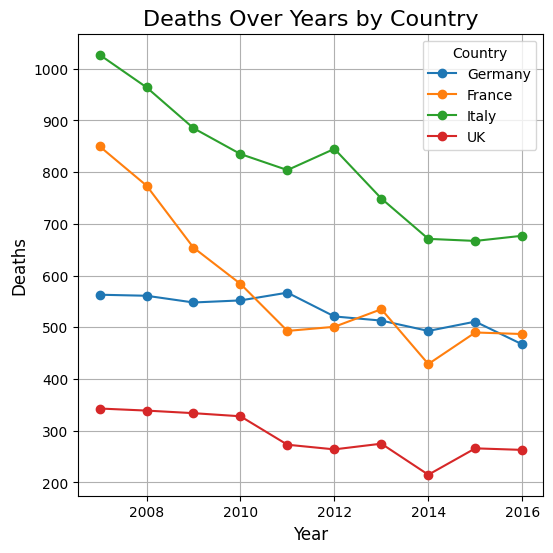

Unique countries in data: ['Germany' 'France' 'Italy' 'UK']


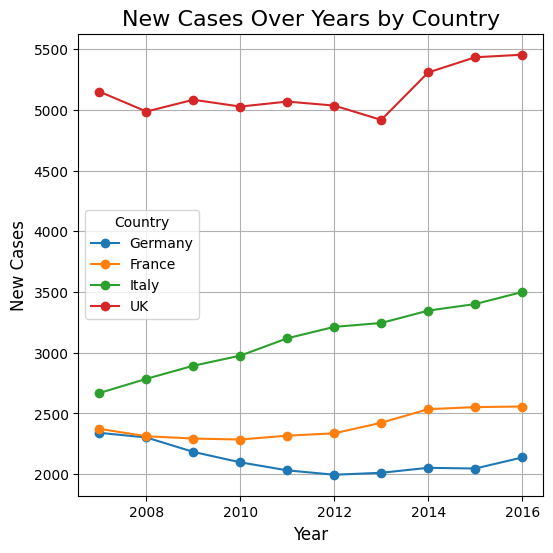

Unique countries in data: ['Germany' 'France' 'Italy' 'UK']


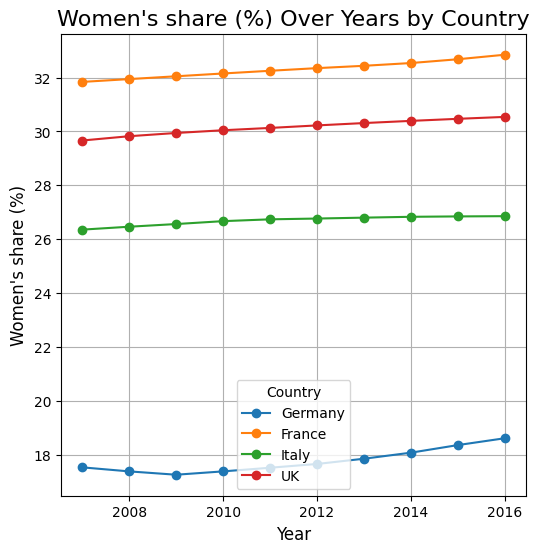

Unique countries in data: ['Germany' 'France' 'Italy' 'UK']


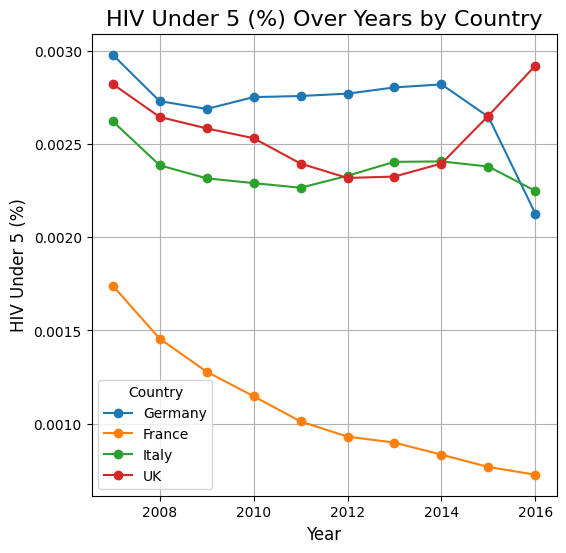

Unique countries in data: ['Germany' 'France' 'Italy' 'UK']


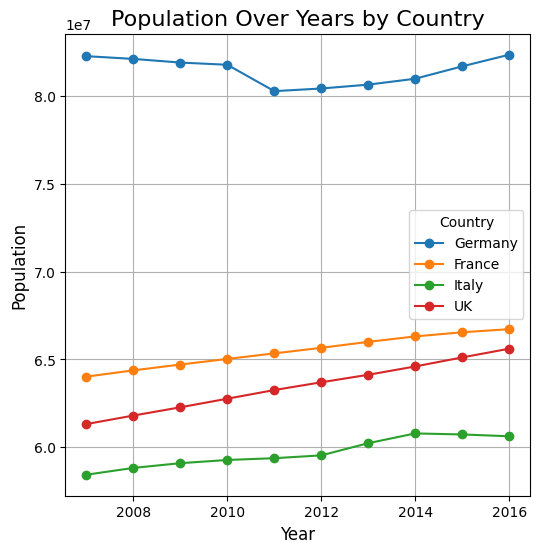

Unique countries in data: ['Germany' 'France' 'Italy' 'UK']


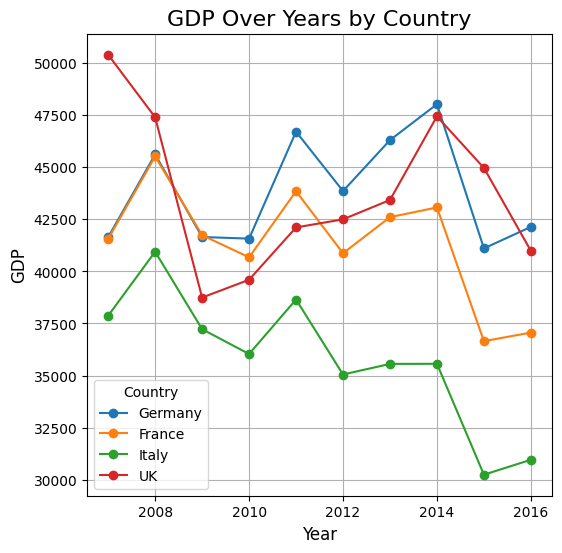

Unique countries in data: ['Germany' 'France' 'Italy' 'UK']


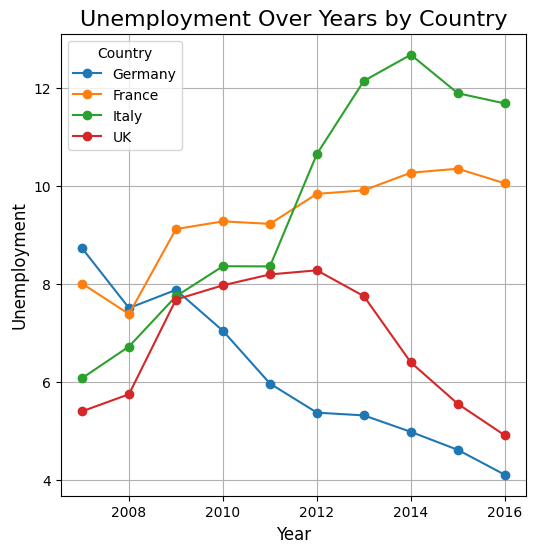

In [8]:
for column in data.columns:
    if column != 'Country' and column!= 'Year':
        plot_column(data,column)

<Figure size 1200x700 with 0 Axes>

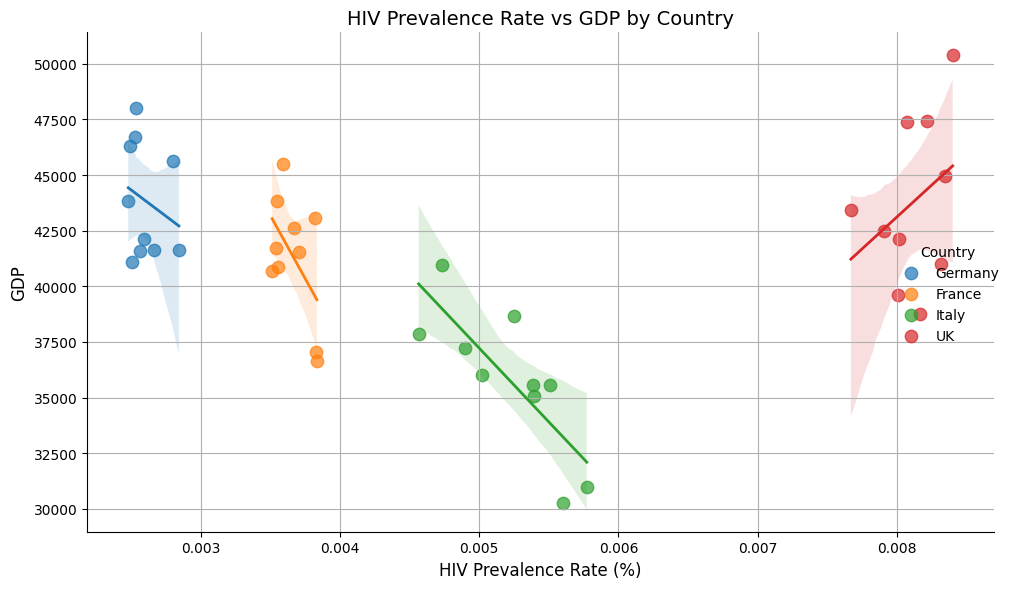

<Figure size 1200x700 with 0 Axes>

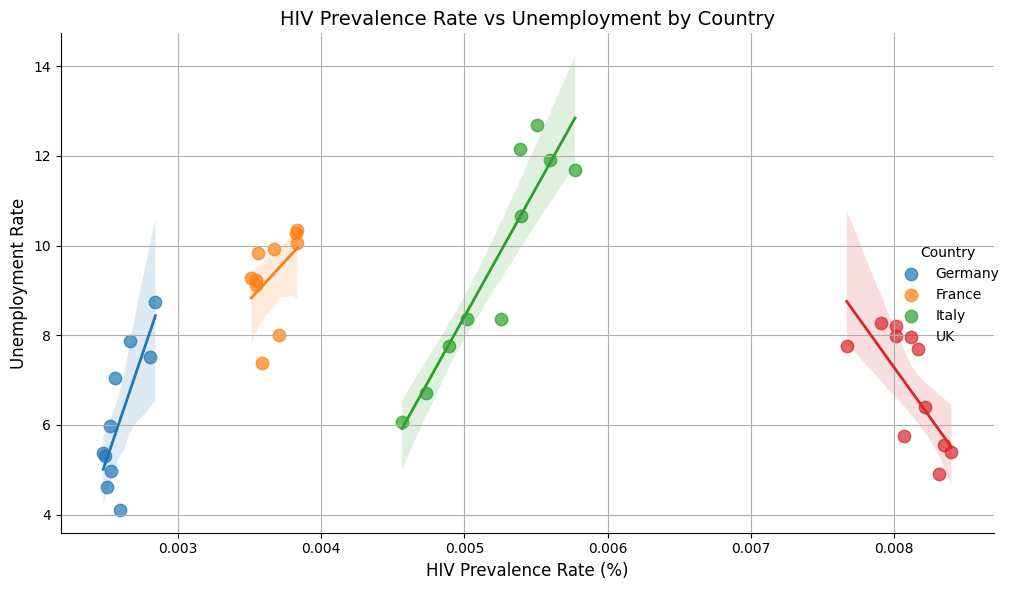

In [16]:
import seaborn as sns

# 1. Calculate HIV Prevalence Rate
data["HIV Prevalence Rate (%)"] = (data["New Cases"] / data["Population"]) * 100

# 2. Scatter plot: HIV Prevalence Rate vs GDP by Country
plt.figure(figsize=(12, 7))
sns.lmplot(
    data=data,
    x="HIV Prevalence Rate (%)",
    y="GDP",
    hue="Country",
    palette="tab10",
    height=6,
    aspect=1.5,
    markers="o",
    scatter_kws={"s": 80, "alpha": 0.7},
    line_kws={"linewidth": 2}
)
plt.title("HIV Prevalence Rate vs GDP by Country", fontsize=14)
plt.xlabel("HIV Prevalence Rate (%)", fontsize=12)
plt.ylabel("GDP", fontsize=12)
plt.savefig(f'../images/hiv_prevalance_gdp')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Scatter plot: HIV Prevalence Rate vs Unemployment by Country
plt.figure(figsize=(12, 7))
sns.lmplot(
    data=data,
    x="HIV Prevalence Rate (%)",
    y="Unemployment",
    hue="Country",
    palette="tab10",
    height=6,
    aspect=1.5,
    markers="o",
    scatter_kws={"s": 80, "alpha": 0.7},
    line_kws={"linewidth": 2}
)
plt.title("HIV Prevalence Rate vs Unemployment by Country", fontsize=14)
plt.xlabel("HIV Prevalence Rate (%)", fontsize=12)
plt.ylabel("Unemployment Rate", fontsize=12)
plt.savefig(f'../images/hiv_prevalance_unemployment')
plt.grid(True)
plt.tight_layout()
plt.show()
